In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from collections import Counter
import random

In [2]:
data = pd.read_csv('stud_math.csv')

In [3]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [4]:
# dropping 'studytime, granular' (dunno what's this, looks useless)

data.drop(['studytime, granular'], axis=1, inplace=True)

In [5]:
# unifying columns names (lower letters only in columns names)

data.rename(columns=lambda x: x.replace(x, x.lower()), inplace=True)

In [6]:
# converting dtypes (for 'float's to 'int's mostly)

data = data.convert_dtypes(infer_objects=True, convert_integer=True)

In [7]:
# retrieving NaN-free data (for a posteriori estimation of work's quality)

data_clean = data.copy()
data_clean.dropna(inplace=True)

#data_clean.info()

In [8]:
data

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,<NA>,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,<NA>,no,4,3,4,3,6,30
1,GP,F,17,U,GT3,<NA>,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,3,4,30
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,<NA>,no,yes,yes,yes,<NA>,4,3,2,3,10,50
3,GP,F,15,U,GT3,T,4,2,health,<NA>,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,5,2,75
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,5,4,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,<NA>,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,212,45
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,2,3,80
392,MS,M,21,R,GT3,T,1,1,other,other,course,<NA>,1,1,3,<NA>,no,no,no,no,<NA>,no,no,5,5,3,3,3,35
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,<NA>,no,yes,yes,no,4,4,1,5,0,50


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    string
 1   sex         395 non-null    string
 2   age         395 non-null    Int64 
 3   address     378 non-null    string
 4   famsize     368 non-null    string
 5   pstatus     350 non-null    string
 6   medu        392 non-null    Int64 
 7   fedu        371 non-null    Int64 
 8   mjob        376 non-null    string
 9   fjob        359 non-null    string
 10  reason      378 non-null    string
 11  guardian    364 non-null    string
 12  traveltime  367 non-null    Int64 
 13  studytime   388 non-null    Int64 
 14  failures    373 non-null    Int64 
 15  schoolsup   386 non-null    string
 16  famsup      356 non-null    string
 17  paid        355 non-null    string
 18  activities  381 non-null    string
 19  nursery     379 non-null    string
 20  higher    

In [10]:
# scales info

#display(data.famrel.unique())
#display(data.famrel.value_counts())

#display(data.freetime.unique())
#display(data.freetime.value_counts())

#display(data.goout.unique())
#display(data.goout.value_counts())

#display(data.health.unique())
#display(data.health.value_counts())

In [11]:
# scales: 'family relations', 'freetime', 'go out', 'health' - replacing NaN, 

data.famrel = data.famrel.fillna(0)
data.freetime = data.freetime.fillna(0)
data.goout = data.goout.fillna(0)
data.health = data.health.fillna(0)

In [12]:
# scales: 'family relations', 'freetime', 'go out', 'health' - deleting outliers

data = data.loc[data.famrel.between(1,5)]
data = data.loc[data.freetime.between(1,5)]
data = data.loc[data.goout.between(1,5)]
data = data.loc[data.health.between(1,5)]

Scales are okay, data is clean


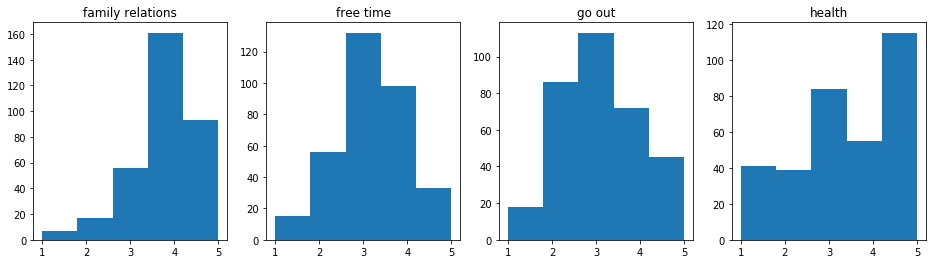

In [13]:
# scales: 'family relations', 'freetime', 'go out', 'health' - distribution of values

fig, axes = plt.subplots(1, 4, figsize = (16, 4))

axes[0].hist(data.famrel, bins=5)
axes[0].set_title('family relations')

axes[1].hist(data.freetime, bins=5)
axes[1].set_title('free time')

axes[2].hist(data.goout, bins=5)
axes[2].set_title('go out')

axes[3].hist(data.health, bins=5)
axes[3].set_title('health')

print('Scales are okay, data is clean')

count    322.000000
mean       7.276398
std       25.012670
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

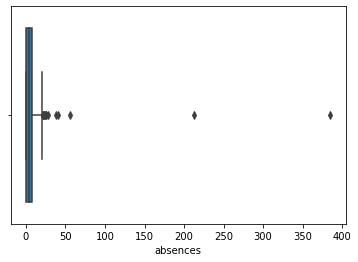

In [14]:
sns.boxplot(data.absences)
data.absences.describe()

# let's take a look at 'absences'

In [15]:
# only 12 'nan' of 320+ values and some enormous outliers
# It's okay to fill 'nan' with median value of 'absences'

abs_med = data.absences.median()

data.absences = data.absences.fillna(abs_med)

In [16]:
# defining IQR and deleting outliers in 'absences'

abs_perc25 = data.absences.quantile(0.25)
abs_perc75 = data.absences.quantile(0.75)
abs_IQR = abs_perc75 - abs_perc25

data = data.loc[data.absences.between(abs_perc25 - 1.5*abs_IQR, abs_perc75 + 1.5*abs_IQR)]

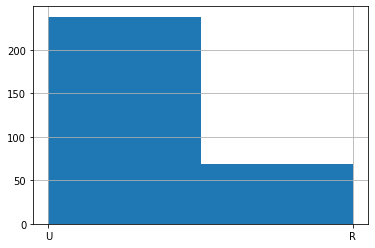

In [17]:
# address

data.address.hist(bins=2)

In [18]:
data.address.value_counts()

U    238
R     69
Name: address, dtype: Int64

In [19]:
# few 'nan' and prevailing 'U' allows to fill 'nan' with the nearest values. 
# It will allow to save data and will not affect drastically on distribution 
# filling 'nan' in 'address' with nearest values

data.address = data.address.fillna(method='ffill')

In [20]:
# 'famsize'

data.famsize.value_counts()

GT3    213
LE3     87
Name: famsize, dtype: Int64

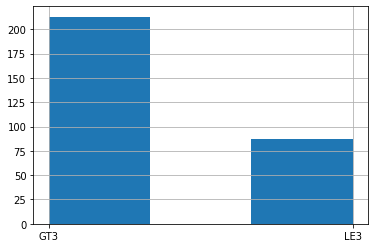

In [21]:
data.famsize.hist(bins=3)

In [22]:
# same strategy as in 'address' seems to be appropriate here

data.famsize = data.famsize.fillna(method='ffill')

In [23]:
# filling the last 'nan' in 'famsize' with the most common value - GT3

data.famsize = data.famsize.fillna('GT3')

In [24]:
# 'pstatus'

data.pstatus.value_counts()

T    259
A     26
Name: pstatus, dtype: Int64

In [25]:
# same strategy as in 'address' and 'famsize' for 'pstatus'

data.pstatus = data.pstatus.fillna(method='ffill')

In [26]:
# 'medu' and 'fedu'

data.medu.value_counts()

4    109
2     83
3     79
1     44
0      3
Name: medu, dtype: Int64

In [27]:
# removing two 'nan' in 'medu'

medu_median = data.medu.median()
data.medu = data.medu.fillna(medu_median)

In [28]:
# done! no 'nan' in 'medu', 'medu'is okay!

data.medu.isnull().sum()

0

In [29]:
data.fedu.value_counts()

2     88
3     76
4     76
1     59
0      2
40     1
Name: fedu, dtype: Int64

In [30]:
# Experiment
# let's make copies of the array and choose the best method of dealing with 'nan' in fedu

fedu1 = data.fedu.copy()
fedu2 = data.fedu.copy()

fedu1_1 = fedu1.fillna(method = 'ffill')
fedu1_2 = fedu2.fillna(method = 'bfill')



fedu1_1 = fedu1_1.replace(40, 4)
fedu1_2 = fedu1_2.replace(40, 4)

In [31]:
fedu2_med = fedu2.median()
fedu2 = fedu2.fillna(fedu2_med)
fedu2 = fedu2.replace(40, 4)

In [32]:
fedu1_1.value_counts()

2    94
3    83
4    80
1    61
0     2
Name: fedu, dtype: Int64

In [33]:
fedu1_2.value_counts()

2    95
4    79
3    78
1    66
0     2
Name: fedu, dtype: Int64

In [34]:
fedu2.value_counts()

3    94
2    88
4    77
1    59
0     2
Name: fedu, dtype: Int64

Text(0.5, 1.0, 'fedu2')

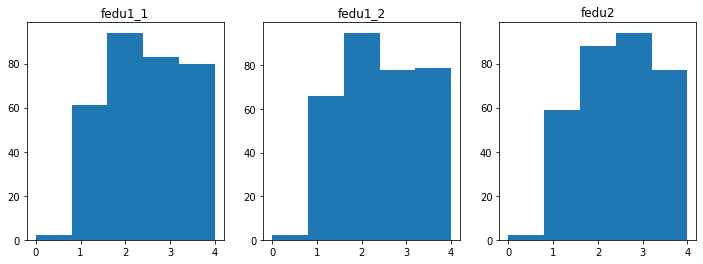

In [35]:
# visualising experiment's results

fig, axes = plt.subplots(1, 3, figsize = (12, 4))

axes[0].hist(fedu1_1, bins=5)
axes[0].set_title('fedu1_1')

axes[1].hist(fedu1_2, bins=5)
axes[1].set_title('fedu1_2')

axes[2].hist(fedu2, bins=5)
axes[2].set_title('fedu2')

In [36]:
# filling 'nan' with fedu.median - worst strategy out of three

# distribution in fedu1_1 looks more similar to original data, so 'ffill' is more precise than 'bfill'

data.fedu = data.fedu.fillna(method='ffill')
data.fedu = data.fedu.replace(40, 4)

In [37]:
data.medu.value_counts()

4    109
2     83
3     81
1     44
0      3
Name: medu, dtype: Int64

In [38]:
# 'mjob', 'fjob'

display(data.mjob.value_counts())
display(data.fjob.value_counts())

other       111
services     76
at_home      46
teacher      46
health       28
Name: mjob, dtype: Int64

other       160
services     79
teacher      27
at_home      14
health       11
Name: fjob, dtype: Int64

In [39]:
display(data.mjob.isnull().sum())

display(data.fjob.isnull().sum())

13

29

In [40]:
# 'higher'
# very few 'nan' and 'no', so it's safe to fill 'nan' with 'yes'

data.higher = data.higher.fillna('yes')

In [41]:
data.higher.value_counts()

yes    306
no      14
Name: higher, dtype: Int64

In [42]:
# dropping rows with empty cells in 'score'

data.dropna(subset=['score'], inplace=True)

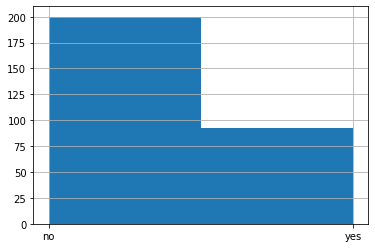

In [43]:
data.romantic.hist(bins=2)

In [44]:
# few 'nan' in 'romantic', not that matter how to replace them.

data.romantic = data.romantic.fillna(method='ffill')

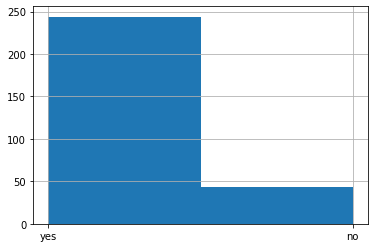

In [45]:
data.internet.hist(bins=2)

In [46]:
data.internet.isnull().sum()

30

In [47]:
# creating list of possible answers for 'internet'
internet1 = data.internet.unique()
internet1 = internet1.dropna()
internet1 = list(internet1)

In [48]:
param = random.sample(internet1, 1)
param

['no']

In [49]:
#data.internet = data.internet.fillna(random.sample(internet1, 1))

In [50]:
data.internet[0]

<NA>

In [51]:
data1=data.copy()
data1.dropna(inplace = True)

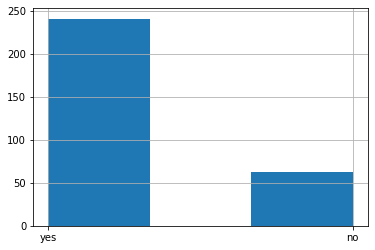

In [52]:
data.nursery.hist(bins=3)

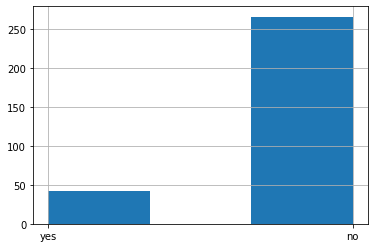

In [53]:
data.schoolsup.hist(bins=3)

In [54]:
# similar distribution type and few 'nan' in 'nursery', 'schoolsup' and 'internet', no matter how to replace them. they will not affect strongly on distribution of values.

data.nursery = data.nursery.fillna(method='ffill')
data.schoolsup = data.schoolsup.fillna(method='ffill')
data.internet = data.internet.fillna(method='bfill')

In [55]:
data.guardian = data.guardian.fillna(method='bfill')

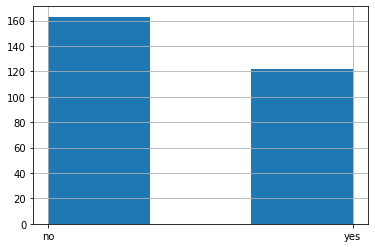

In [56]:
data.paid.hist(bins=3)

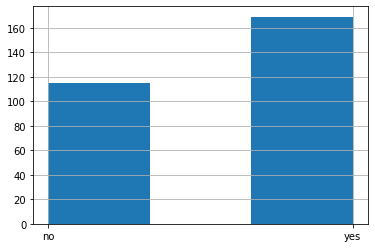

In [57]:
data.famsup.hist(bins=3)

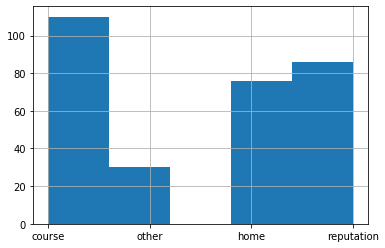

In [58]:
data.reason.hist(bins=5)

In [59]:
# no time to elaborate!!
# time for choice randomiser - smth went wrong with functions, copypaste works better in 'no time to think' situation
# sorry for awful code

mjob_lst = data.mjob.unique().dropna()
fjob_lst = data.fjob.unique().dropna()
paid_lst = data.paid.unique().dropna()
reason_lst = data.reason.unique().dropna()
traveltime_lst = data.traveltime.unique().dropna()
studytime_lst = data.studytime.unique().dropna()
activities_lst = data.activities.unique().dropna()
activities_lst = data.activities.unique().dropna()
failures_lst = data.failures.unique().dropna()
famsup_lst = data.famsup.unique().dropna()

data.paid = data.paid.fillna(random.choice(paid_lst))
data.mjob = data.mjob.fillna(random.choice(mjob_lst))
data.fjob = data.fjob.fillna(random.choice(fjob_lst))
data.reason = data.reason.fillna(random.choice(reason_lst))
data.traveltime = data.traveltime.fillna(random.choice(traveltime_lst))
data.studytime = data.studytime.fillna(random.choice(studytime_lst))
data.activities = data.activities.fillna(random.choice(activities_lst))
data.failures = data.failures.fillna(random.choice(failures_lst))
data.famsup = data.famsup.fillna(random.choice(famsup_lst))

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      317 non-null    string
 1   sex         317 non-null    string
 2   age         317 non-null    Int64 
 3   address     317 non-null    string
 4   famsize     317 non-null    string
 5   pstatus     317 non-null    string
 6   medu        317 non-null    Int64 
 7   fedu        317 non-null    Int64 
 8   mjob        317 non-null    string
 9   fjob        317 non-null    string
 10  reason      317 non-null    string
 11  guardian    317 non-null    string
 12  traveltime  317 non-null    Int64 
 13  studytime   317 non-null    Int64 
 14  failures    317 non-null    Int64 
 15  schoolsup   317 non-null    string
 16  famsup      317 non-null    string
 17  paid        317 non-null    string
 18  activities  317 non-null    string
 19  nursery     317 non-null    string
 20  higher    

# data is clean, no 'nan'!

In [61]:
# correlation of values in nan-free data

data_clean.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.071662,-0.056929,0.143682,-0.220209,0.320914,0.057039,0.040115,0.106748,0.037152,0.142780,-0.186407
medu,-0.071662,1.000000,0.684379,-0.248099,-0.042491,-0.135065,-0.032146,-0.032350,0.023938,-0.124250,0.101253,0.064914
fedu,-0.056929,0.684379,1.000000,-0.162149,-0.001350,-0.189926,-0.059084,-0.135575,-0.087894,0.086575,0.059172,-0.014236
traveltime,0.143682,-0.248099,-0.162149,1.000000,-0.034571,-0.029138,-0.134113,-0.071376,-0.094331,0.147160,-0.148719,-0.094874
studytime,-0.220209,-0.042491,-0.001350,-0.034571,1.000000,-0.016541,0.025253,-0.226503,-0.129162,-0.067115,-0.018695,-0.029742
failures,0.320914,-0.135065,-0.189926,-0.029138,-0.016541,1.000000,-0.095520,-0.043110,-0.021022,0.057279,0.239602,-0.314698
famrel,0.057039,-0.032146,-0.059084,-0.134113,0.025253,-0.095520,1.000000,0.084336,0.069922,0.178145,0.016312,-0.026742
freetime,0.040115,-0.032350,-0.135575,-0.071376,-0.226503,-0.043110,0.084336,1.000000,0.381049,0.120714,0.093512,0.068862
goout,0.106748,0.023938,-0.087894,-0.094331,-0.129162,-0.021022,0.069922,0.381049,1.000000,-0.033206,0.094859,-0.079187
health,0.037152,-0.124250,0.086575,0.147160,-0.067115,0.057279,0.178145,0.120714,-0.033206,1.000000,-0.019866,-0.103462


In [62]:
# correlation in data

data.corr()


,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.167134,-0.195513,0.028600,-0.042162,0.154563,0.059762,0.021089,0.113838,-0.078373,0.115610,-0.168514
medu,-0.167134,1.000000,0.593024,-0.154248,0.094001,-0.203750,-0.013994,0.068356,0.085460,-0.072398,0.121504,0.190417
fedu,-0.195513,0.593024,1.000000,-0.140905,0.005935,-0.243965,-0.022215,-0.009461,0.026200,0.013322,-0.023762,0.072998
traveltime,0.028600,-0.154248,-0.140905,1.000000,-0.064138,0.045308,-0.038970,-0.068525,-0.072204,0.093496,-0.061993,-0.073923
studytime,-0.042162,0.094001,0.005935,-0.064138,1.000000,-0.173452,0.028805,-0.149581,-0.068485,-0.082920,-0.073220,0.101456
failures,0.154563,-0.203750,-0.243965,0.045308,-0.173452,1.000000,-0.001875,0.096966,0.091325,0.075099,0.033521,-0.324397
famrel,0.059762,-0.013994,-0.022215,-0.038970,0.028805,-0.001875,1.000000,0.157558,0.043025,0.095766,-0.071763,0.057722
freetime,0.021089,0.068356,-0.009461,-0.068525,-0.149581,0.096966,0.157558,1.000000,0.306169,0.086550,0.156420,0.061583
goout,0.113838,0.085460,0.026200,-0.072204,-0.068485,0.091325,0.043025,0.306169,1.000000,-0.051877,0.128806,-0.086686
health,-0.078373,-0.072398,0.013322,0.093496,-0.082920,0.075099,0.095766,0.086550,-0.051877,1.000000,-0.010898,-0.053052


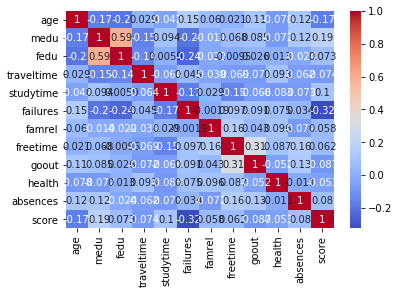

In [63]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap = 'coolwarm')

## Edited data looks better than data after dropping all 'nan' at the very begining.

### Score has strongest correlation with 'medu' and 'absences' (reversed)

### Such columns as 'health', 'goout', 'freetime', 'traveltime' can be removed from the data

# Analisys of nominative values

## Boxplots!

In [64]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

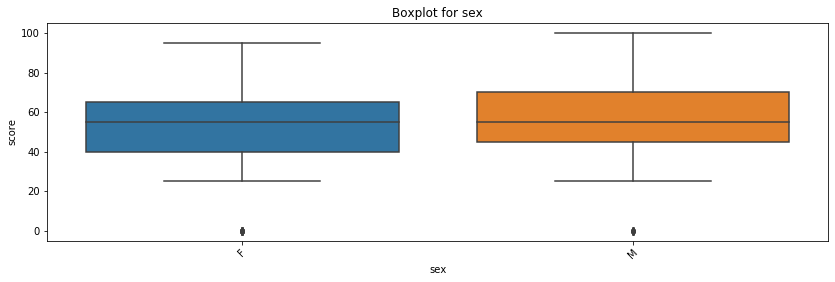

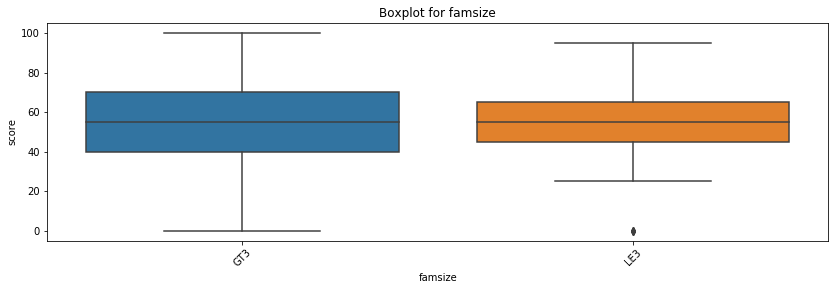

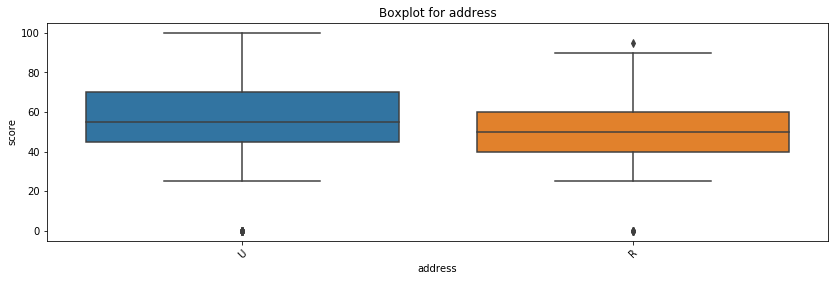

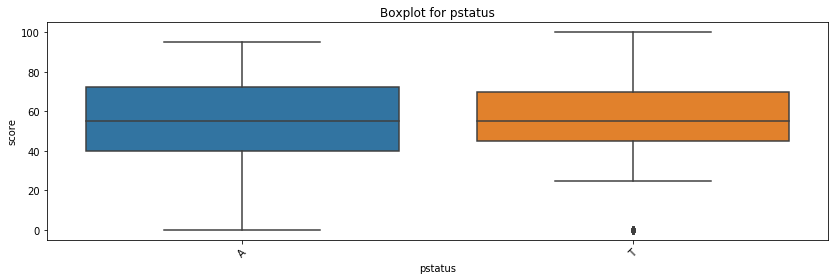

In [65]:
for col in ['sex', 'famsize', 'address', 'pstatus']:
    get_boxplot(col)

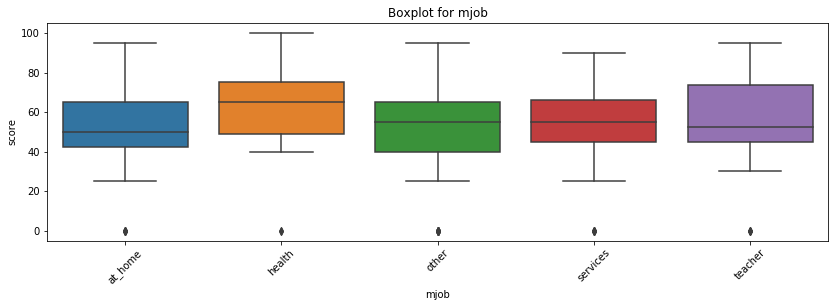

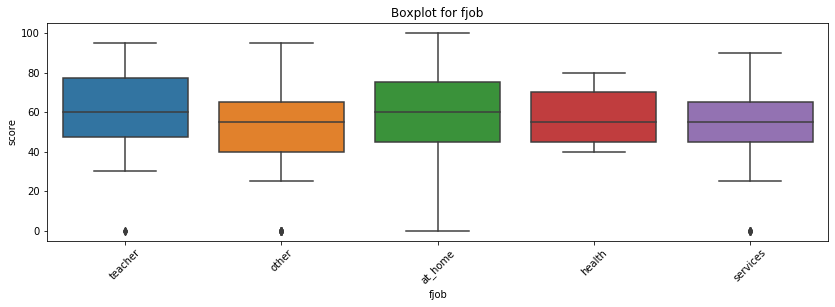

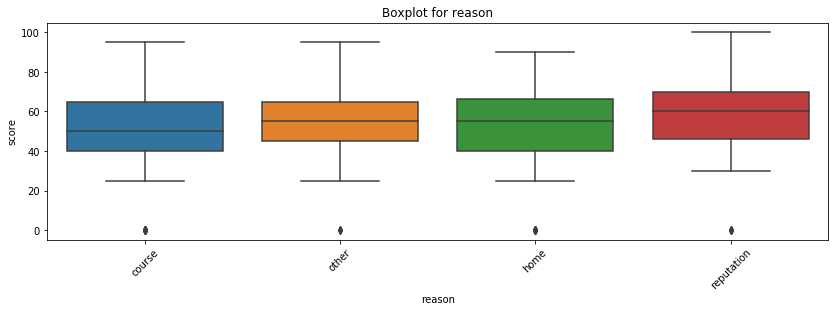

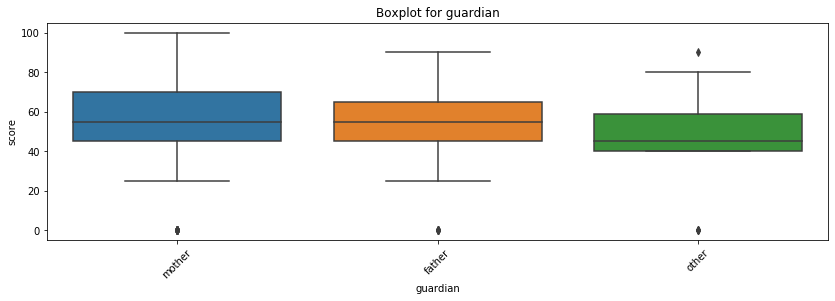

In [66]:
for col in ['mjob', 'fjob', 'reason', 'guardian']:
    get_boxplot(col)

## Stats!

In [67]:
# T-stat!

def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'], 
                        data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('This column(s) ->', column)
            break

In [68]:
for col in ['sex', 
            'famsize', 
            'address', 
            'pstatus', 
            'mjob', 
            'fjob', 
            'reason', 
            'guardian', 
            'schoolsup', 
            'famsup',
           'paid',
           'activities', 
           'nursery',
           'higher',
           'internet',
           'romantic']:
    get_stat_dif(col)

This column(s) -> sex
This column(s) -> paid
This column(s) -> higher


## Well, looks like sex, additional math classes and desire to receive higher education have the strongest affect on math score...


## Other variables seem to have no affect on math scores

In [69]:
# Backlog
#function - choice randomizer - doesn't work, no time to debug

#def choice_randomizer(col):
#    col_lst = data.col.unique().dropna()
#    data.col = data.col.fillna(random.choice(col_lst))        

In [70]:
#for col in ['mjob', 'fjob']:
#    choice_randomizer(col)